In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of 

/kaggle/input/nifty50-stock-market-data/HDFCBANK.csv
/kaggle/input/nifty50-stock-market-data/GRASIM.csv
/kaggle/input/nifty50-stock-market-data/WIPRO.csv
/kaggle/input/nifty50-stock-market-data/stock_metadata.csv
/kaggle/input/nifty50-stock-market-data/BPCL.csv
/kaggle/input/nifty50-stock-market-data/INFY.csv
/kaggle/input/nifty50-stock-market-data/LT.csv
/kaggle/input/nifty50-stock-market-data/RELIANCE.csv
/kaggle/input/nifty50-stock-market-data/BRITANNIA.csv
/kaggle/input/nifty50-stock-market-data/INFRATEL.csv
/kaggle/input/nifty50-stock-market-data/HEROMOTOCO.csv
/kaggle/input/nifty50-stock-market-data/HINDUNILVR.csv
/kaggle/input/nifty50-stock-market-data/TATAMOTORS.csv
/kaggle/input/nifty50-stock-market-data/MM.csv
/kaggle/input/nifty50-stock-market-data/HDFC.csv
/kaggle/input/nifty50-stock-market-data/JSWSTEEL.csv
/kaggle/input/nifty50-stock-market-data/TITAN.csv
/kaggle/input/nifty50-stock-market-data/HINDALCO.csv
/kaggle/input/nifty50-stock-market-data/AXISBANK.csv
/kaggle/inpu

In [2]:
pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 17.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 35.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 3.0 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293631 sha256=93483c5c700ca0742de59153b0d94e37b18e6bba1ab3fba65faa379af2c75369
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [263]:
from random import gauss
import matplotlib.pyplot as plt
import numpy as np
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import shapiro
from scipy.stats import probplot
import warnings
warnings.simplefilter(action='ignore', category= FutureWarning)
import yfinance as yf
import statsmodels.api as sm
from datetime import datetime, timedelta

In [5]:
sp = yf.download('^GSPC')
sp.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-07-24,5505.839844,5508.040039,5419.979980,5427.129883,5427.129883,3945550000
2024-07-25,5428.700195,5491.589844,5390.950195,5399.220215,5399.220215,4592120000
2024-07-26,5433.669922,5488.319824,5430.700195,5459.100098,5459.100098,3638770000
2024-07-29,5476.549805,5487.740234,5444.439941,5463.540039,5463.540039,3379970000
2024-07-30,5478.729980,5489.459961,5401.700195,5431.459961,5431.459961,2080618000


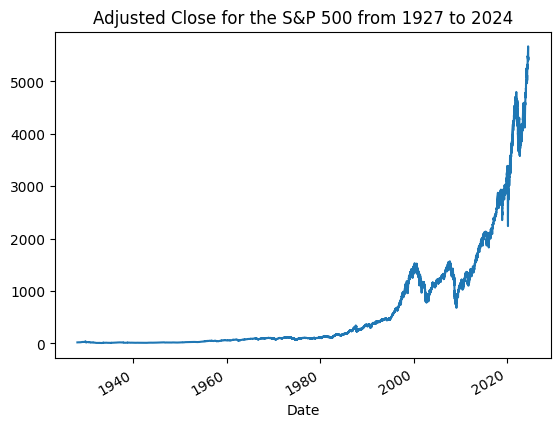

In [6]:
sp['Adj Close'].plot()
plt.title('Adjusted Close for the S&P 500 from 1927 to 2024')
plt.show()

In [7]:
market = sp["Adj Close"]

In [8]:
# Testing for stationary or non-stationary data 
adf_test = sm.tsa.stattools.adfuller(market)
print(f'p-value = {adf_test[1]}') 

p-value = 1.0


In [9]:
#since p-value is 1-> Null hyp satisfied- so we detrend

In [10]:
sp['returns'] = market.pct_change()
sp

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0,NaN
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268
...,...,...,...,...,...,...,...
2024-07-24,5505.839844,5508.040039,5419.979980,5427.129883,5427.129883,3945550000,-0.023149
2024-07-25,5428.700195,5491.589844,5390.950195,5399.220215,5399.220215,4592120000,-0.005143
2024-07-26,5433.669922,5488.319824,5430.700195,5459.100098,5459.100098,3638770000,0.011090


In [11]:
sp.dropna(inplace = True)
sp

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.005663
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.002252
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.009594
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.006268
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0,-0.009060
...,...,...,...,...,...,...,...
2024-07-24,5505.839844,5508.040039,5419.979980,5427.129883,5427.129883,3945550000,-0.023149
2024-07-25,5428.700195,5491.589844,5390.950195,5399.220215,5399.220215,4592120000,-0.005143
2024-07-26,5433.669922,5488.319824,5430.700195,5459.100098,5459.100098,3638770000,0.011090


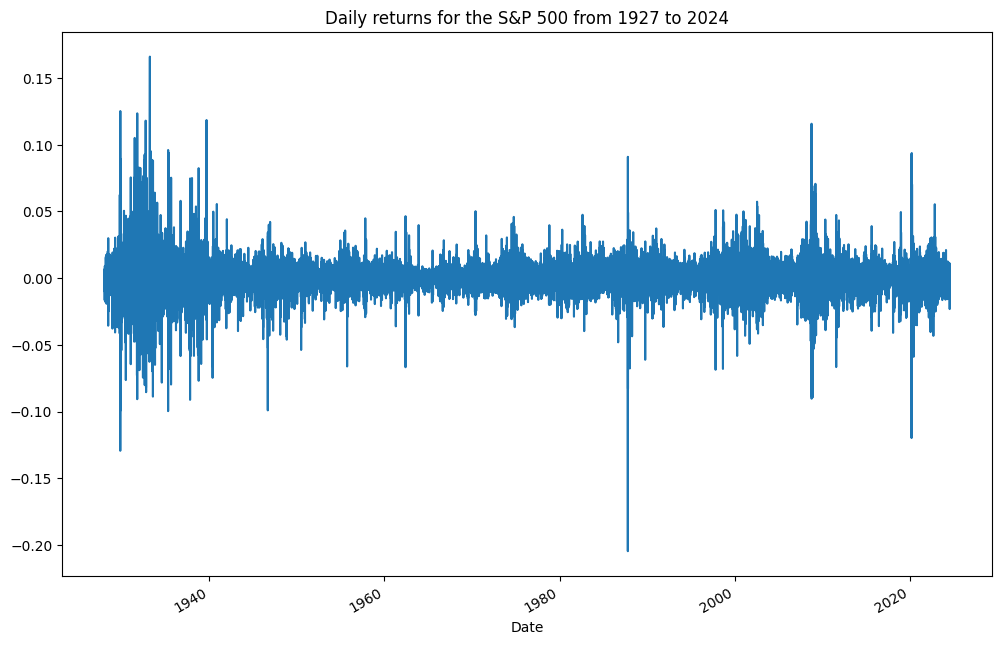

In [12]:
plt.figure(figsize=(12,8))
sp['returns'].plot()
plt.title('Daily returns for the S&P 500 from 1927 to 2024')
plt.show()

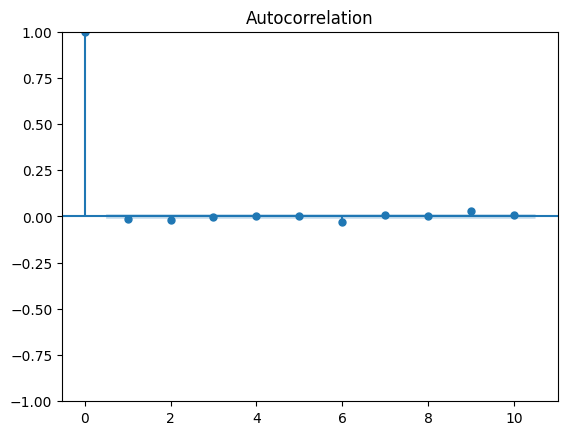

In [13]:
plot_acf(sp['returns'], lags=10)
plt.show()

In [14]:
#garch is appropriate since high spikes in returns are followed by 
#high spikes(relatively possibly lower)
#volatility clustering exists since low spikes and high spikes are close

In [15]:
# Testing for the ARCH effect
model = arch_model(sp['returns'], vol = 'GARCH', p = 1, q = 1, rescale = False)
results = model.fit(disp='off',show_warning = False)
residuals = results.resid
squared_residuals = residuals**2
arch_test = sm.stats.diagnostic.het_arch(squared_residuals)
print(f'ARCH test results:\n')
print(f'LM Statistic: {arch_test[0]}')
print(f'p-value: {arch_test[1]}')
print(f'F Statistic: {arch_test[2]}')
print(f'p-value: {arch_test[3]}')

ARCH test results:

LM Statistic: 159.72416300776956
p-value: 3.694129394574877e-29
F Statistic: 16.07102799261929
p-value: 2.937630540511545e-29


In [16]:
#A p-value below 0.05 indicates that the test results are statistically significant at the 5% level
#providing enough evidence to reject the null hypothesis. 
#This suggests that ARCH effects are present, meaning the volatility of the time series changes over time.

In [211]:
# Fitting ARCH(1) model
model1 = arch_model(sp['returns'],
                       vol = 'ARCH',
                       p = 1, # One lag of the squared residuals
                       rescale = False)
results = model1.fit(disp = 'off', show_warning = False,last_obs="2022-12-31")
print(results.summary()) # Plotting summary

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                74164.0
Distribution:                  Normal   AIC:                          -148322.
Method:            Maximum Likelihood   BIC:                          -148298.
                                        No. Observations:                23864
Date:                Tue, Jul 30 2024   Df Residuals:                    23863
Time:                        21:19:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.6457e-04  8.489e-05      6.651  2.916e-11 [3.

In [212]:
# Fitting ARCH(2) model
model2 = arch_model(sp['returns'],
                       vol = 'ARCH',
                       p = 2, # Two lags of the squared residuals
                       rescale = False)
results2 = model2.fit(disp = 'off', show_warning = False, last_obs="2022-12-31")
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                74164.0
Distribution:                  Normal   AIC:                          -148322.
Method:            Maximum Likelihood   BIC:                          -148298.
                                        No. Observations:                23864
Date:                Tue, Jul 30 2024   Df Residuals:                    23863
Time:                        21:19:14   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.6457e-04  8.489e-05      6.651  2.916e-11 [3.

In [213]:
spnew=sp.copy()

In [214]:
#GARCH(2,2) model
# Rescaling data by multiplying it for 100
spnew['returns'] = spnew['returns'] * 100
spnew

,Open,High,Low,Close,Adj Close,Volume,returns
Date,,,,,,,
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0,0.566254
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0,-0.225230
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0,-0.959368
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0,0.626784
1928-01-09,17.500000,17.500000,17.500000,17.500000,17.500000,0,-0.906001
...,...,...,...,...,...,...,...
2024-07-24,5505.839844,5508.040039,5419.979980,5427.129883,5427.129883,3945550000,-2.314909
2024-07-25,5428.700195,5491.589844,5390.950195,5399.220215,5399.220215,4592120000,-0.514262
2024-07-26,5433.669922,5488.319824,5430.700195,5459.100098,5459.100098,3638770000,1.109047


In [223]:
# Fitting GARCH(1,1) model
model = arch_model(spnew['returns'],
                       vol = 'GARCH',
                       mean='Zero',
                       p = 1,
                       q = 1)
results = model.fit(disp = 'off', show_warning = False, last_obs="2022-12-31")
print(results.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -31716.1
Distribution:                  Normal   AIC:                           63438.3
Method:            Maximum Likelihood   BIC:                           63462.5
                                        No. Observations:                23864
Date:                Tue, Jul 30 2024   Df Residuals:                    23864
Time:                        21:20:56   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0100  1.718e-03      5.825  5.707e-09 [6.

In [216]:
#AIC estimates the amount of information lost, 
#we can conclude the lower its value, the better the model is.
#so, low values of AIC and BIC are preferred in a model

In [217]:
#since AIC and BIC of ARCH(2) is lowest, it will be used to forecast volatility.

In [489]:
# Fitting ARCH(2) model
model2 = arch_model(sp['returns'],
                       vol = 'ARCH',
                       p = 15, 
                       rescale = False)
results = model2.fit(disp = 'off', show_warning = False ,last_obs="2022-12-31")
print(results.summary())

                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                77977.9
Distribution:                  Normal   AIC:                          -155922.
Method:            Maximum Likelihood   BIC:                          -155784.
                                        No. Observations:                23864
Date:                Tue, Jul 30 2024   Df Residuals:                    23863
Time:                        22:41:36   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.8760e-04  5.913e-05      8.247  1.626e-16 [3.

In [490]:
forecasts = results.forecast(start="2023-1-1", reindex=False)
cond_mean = forecasts.mean["2023":]
cond_var = forecasts.variance["2023":]
q = model2.distribution.ppf([0.01, 0.05,0.1])
print(q)

[-2.32634787 -1.64485363 -1.28155157]


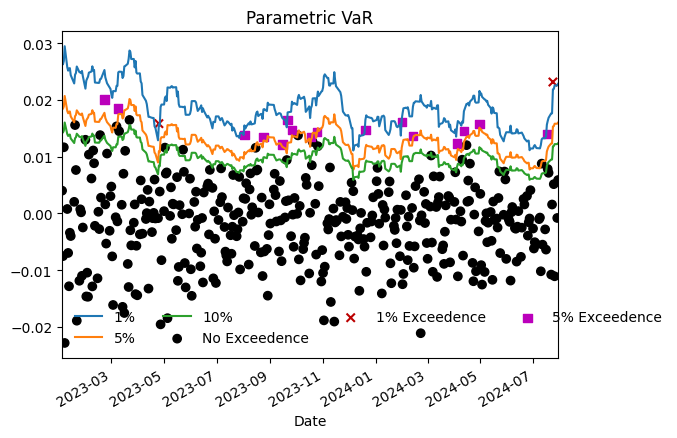

In [491]:

# 1. Compute Value at Risk (VaR)
value_at_risk = -cond_mean.values - np.sqrt(cond_var).values * q[None :]
value_at_risk = pd.DataFrame(value_at_risk, columns=["1%", "5%", "10%"], index=cond_var.index)

# 2. Plot Value at Risk
ax = value_at_risk.plot(legend=False)
xl = ax.set_xlim(value_at_risk.index[0], value_at_risk.index[-1])

# 3. Prepare returns for 2023
rets_2023 = sp['returns']["2023":].copy()
rets_2023.name = "S&P 500 Return"

# Ensure that rets_2023 and value_at_risk have the same index
rets_2023 = rets_2023.reindex(value_at_risk.index)

# 4. Initialize list for colors
c = []
for idx in value_at_risk.index:
    if pd.isna(rets_2023[idx]):
        continue  # Skip dates not in rets_2023
    
    if rets_2023[idx] > -value_at_risk.loc[idx, "5%"]:
        c.append("#000000")  # No Exceedence
    elif rets_2023[idx] < -value_at_risk.loc[idx, "1%"]:
        c.append("#BB0000")  # 1% Exceedence
    elif rets_2023[idx] < -value_at_risk.loc[idx, "10%"]:
        c.append("#BB00BB")  # 5% Exceedence
    else:
        c.append("#00BB00")  # 10% Exceedence

# Convert to numpy array for scatter plot
c = np.array(c, dtype="object")

# Define labels and markers
labels = {"#BB0000": "1% Exceedence", "#BB00BB": "5% Exceedence", "#00BB00": "10% Exceedence", "#000000": "No Exceedence"}
markers = {"#BB0000": "x", "#BB00BB": "s", "#00BB00": "D", "#000000": "o"}

# 5. Plot the scatter plot
for color in np.unique(c):
    sel = c == color
    ax.scatter(
        rets_2023.index[sel],
        -rets_2023.loc[sel],
        marker=markers[color],
        c=c[sel],
        label=labels[color]
    )

# Set title and legend
ax.set_title("Parametric VaR")
leg = ax.legend(frameon=False, ncol=4)

# Show the plot
plt.show()


In [492]:
value_at_risk

,1%,5%,10%
Date,,,
2023-01-03,0.027100,0.019018,0.014710
2023-01-04,0.026261,0.018425,0.014248
2023-01-05,0.026866,0.018853,0.014581
2023-01-06,0.029456,0.020684,0.016008
2023-01-09,0.025732,0.018051,0.013956
...,...,...,...
2024-07-24,0.021843,0.015302,0.011814
2024-07-25,0.021920,0.015356,0.011856
2024-07-26,0.022547,0.015799,0.012202


Each value represents the maximum loss expected, at a specific confidence level, over a given time period. The confidence levels here are 1% and 5%.

1% VaR: Indicates the loss threshold that will be exceeded with a 1% probability. In other words, there's a 1% chance that the actual loss will be greater than this value.

 **99% chance that the loss will be less than or equal to this VaR value.**

5% VaR: Indicates the loss threshold that will be exceeded with a 5% probability. This means there's a 5% chance that the actual loss will be greater than this value.

 **95% chance that the loss will be less than or equal to this VaR value.**

In [493]:
actual_returns = sp['returns']['2023-1-1':]

In [494]:
exceedances = pd.DataFrame(index=value_at_risk.index)
exceedances['1%_exceed'] = actual_returns < -value_at_risk["1%"]
exceedances['5%_exceed'] = actual_returns < -value_at_risk["5%"]
exceedances['10%_exceed'] = actual_returns < -value_at_risk["10%"]

In [495]:
coverage_1 = exceedances['1%_exceed'].mean()  # Should be close to 0.01
coverage_5 = exceedances['5%_exceed'].mean()  # Should be close to 0.05
coverage_10 = exceedances['10%_exceed'].mean()  # Should be close to 0.1

In [496]:
import plotly.graph_objects as go

fig = go.Figure()

# Add actual returns
fig.add_trace(go.Scatter(x=rets_2023.index, y=rets_2023, mode='lines', name='Actual Returns'))

# Add VaR thresholds
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["1%"], mode='lines', name='1% VaR', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["5%"], mode='lines', name='5% VaR', line=dict(color='orange', dash='dash')))
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["10%"], mode='lines', name='10% VaR', line=dict(color='green', dash='dash')))

# Fill between VaR levels
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["1%"], mode='lines', fill='tozeroy', name='VaR Range (1%)', fillcolor='rgba(255, 0, 0, 0.3)'))
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["5%"], mode='lines', fill='tonexty', name='VaR Range (5%)', fillcolor='rgba(255, 165, 0, 0.3)'))
fig.add_trace(go.Scatter(x=value_at_risk.index, y=-value_at_risk["10%"], mode='lines', fill='tonexty', name='VaR Range (10%)', fillcolor='rgba(0, 255, 0, 0.3)'))

fig.update_layout(title='VaR Backtesting', xaxis_title='Date', yaxis_title='Returns')
fig.show()


In [497]:
# Compute hit ratios
hits_1_percent = (rets_2023 < -value_at_risk["1%"]).sum()
hits_5_percent = (rets_2023 < -value_at_risk["5%"]).sum()
hits_10_percent = (rets_2023 < -value_at_risk["10%"]).sum()

total_observations = len(rets_2023)

hit_ratio_1_percent = (hits_1_percent / total_observations) * 100
hit_ratio_5_percent = (hits_5_percent / total_observations) * 100
hit_ratio_10_percent = (hits_10_percent / total_observations) * 100

print(f'Hit Ratio for 1% VaR: {hit_ratio_1_percent:.2f}%')
print(f'Hit Ratio for 5% VaR: {hit_ratio_5_percent:.2f}%')
print(f'Hit Ratio for 10% VaR: {hit_ratio_10_percent:.2f}%')

Hit Ratio for 1% VaR: 0.51%
Hit Ratio for 5% VaR: 4.56%
Hit Ratio for 10% VaR: 8.86%


In [498]:
# Compute MAE
mae_1_percent = np.mean(np.abs(rets_2023 - value_at_risk["1%"]))
mae_5_percent = np.mean(np.abs(rets_2023 - value_at_risk["5%"]))
mae_10_percent = np.mean(np.abs(rets_2023 - value_at_risk["10%"]))

print(f'MAE for 1% VaR: {mae_1_percent:.2f}')
print(f'MAE for 5% VaR: {mae_5_percent:.2f}')
print(f'MAE for 10% VaR: {mae_10_percent:.2f}')

MAE for 1% VaR: 0.02
MAE for 5% VaR: 0.01
MAE for 10% VaR: 0.01


In [499]:
percentage_error_1_percent = (mae_1_percent / value_at_risk["1%"].mean()) * 100
percentage_error_5_percent = (mae_5_percent / value_at_risk["5%"].mean()) * 100
percentage_error_10_percent = (mae_10_percent / value_at_risk["10%"].mean()) * 100

print(f'Percentage Error for 1% VaR: {percentage_error_1_percent:.2f}%')
print(f'Percentage Error for 5% VaR: {percentage_error_5_percent:.2f}%')
print(f'Percentage Error for 10% VaR: {percentage_error_10_percent:.2f}%')

Percentage Error for 1% VaR: 95.14%
Percentage Error for 5% VaR: 94.49%
Percentage Error for 10% VaR: 97.93%


In [500]:
total_observations = len(actual_returns)
expected_exceedances = total_observations * (1 - 0.1)  # For 5% VaR, expected exceedances = 10% of the time
actual_exceedances = hits_10_percent

accuracy_percentage = 100 - ((abs(expected_exceedances - actual_exceedances) / total_observations) * 100)
print(f'Accuracy Percentage for 10% VaR: {accuracy_percentage:.2f}%')


Accuracy Percentage for 10% VaR: 18.86%
